# Swan Teleco - Data EDA & Exploring the Churners

### Reading in Data and importing modules

In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
swans = pd.read_csv('project_data.csv')

#### Initial look at data

In [2]:
swans.head()

,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,...,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Reason
0,3668-QPYBK,1,United States,California,Los Angeles,90003,"33.964131, -118.272783",33.964131,-118.272783,Male,...,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1,Competitor made better offer
1,9237-HQITU,1,United States,California,Los Angeles,90005,"34.059281, -118.30742",34.059281,-118.307420,Female,...,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1,Moved
2,9305-CDSKC,1,United States,California,Los Angeles,90006,"34.048013, -118.293953",34.048013,-118.293953,Female,...,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes,1,Moved
3,7892-POOKP,1,United States,California,Los Angeles,90010,"34.062125, -118.315709",34.062125,-118.315709,Female,...,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes,1,Moved
4,0280-XJGEX,1,United States,California,Los Angeles,90015,"34.039224, -118.266293",34.039224,-118.266293,Male,...,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,Yes,1,Competitor had better devices


#### Checking for null values

In [3]:
swans.isnull().sum() 

CustomerID              0
Count                   0
Country                 0
State                   0
City                    0
Zip Code                0
Lat Long                0
Latitude                0
Longitude               0
Gender                  0
Senior Citizen          0
Partner                 0
Dependents              0
Tenure Months           0
Phone Service           0
Multiple Lines          0
Internet Service        0
Online Security         0
Online Backup           0
Device Protection       0
Tech Support            0
Streaming TV            0
Streaming Movies        0
Contract                0
Paperless Billing       0
Payment Method          0
Monthly Charges         0
Total Charges           0
Churn Label             0
Churn Value             0
Churn Reason         5174
dtype: int64

#### Examining data types & observation/column quantity

In [4]:
swans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 31 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CustomerID         7043 non-null   object 
 1   Count              7043 non-null   int64  
 2   Country            7043 non-null   object 
 3   State              7043 non-null   object 
 4   City               7043 non-null   object 
 5   Zip Code           7043 non-null   int64  
 6   Lat Long           7043 non-null   object 
 7   Latitude           7043 non-null   float64
 8   Longitude          7043 non-null   float64
 9   Gender             7043 non-null   object 
 10  Senior Citizen     7043 non-null   object 
 11  Partner            7043 non-null   object 
 12  Dependents         7043 non-null   object 
 13  Tenure Months      7043 non-null   int64  
 14  Phone Service      7043 non-null   object 
 15  Multiple Lines     7043 non-null   object 
 16  Internet Service   7043 

#### Removing unnecessary columns

The below columns have been removed for the following reasons:

* These columns have been removed due to us using 'City' to catergorise people geographically:

      - 'Longitude'
      - 'Latitude'
      - 'Lat Long'
      - 'Zip Code'
<br>

* These columns have been dropped as they all included the same data across every observation:

      - 'Country' (USA)
      - 'State' (California)
      - 'Count' (1)

In [5]:
# Dropping irrelevent columns
cleaned_swans = swans.drop(columns=['Longitude', 'Latitude', 'Lat Long', 'Zip Code', 'State', 'Country', 'Count'])

#### Splitting the data into churners and existing customers

In [6]:
churners = cleaned_swans[cleaned_swans['Churn Label'] == 'Yes']
customers = cleaned_swans[cleaned_swans['Churn Label'] == 'No']

In [7]:
# Confirming no nulls in churners
churners.isnull().sum()

CustomerID           0
City                 0
Gender               0
Senior Citizen       0
Partner              0
Dependents           0
Tenure Months        0
Phone Service        0
Multiple Lines       0
Internet Service     0
Online Security      0
Online Backup        0
Device Protection    0
Tech Support         0
Streaming TV         0
Streaming Movies     0
Contract             0
Paperless Billing    0
Payment Method       0
Monthly Charges      0
Total Charges        0
Churn Label          0
Churn Value          0
Churn Reason         0
dtype: int64

In [8]:
# Confirming on nulls in 'Churn Reason' for customers
customers.isnull().sum()

CustomerID              0
City                    0
Gender                  0
Senior Citizen          0
Partner                 0
Dependents              0
Tenure Months           0
Phone Service           0
Multiple Lines          0
Internet Service        0
Online Security         0
Online Backup           0
Device Protection       0
Tech Support            0
Streaming TV            0
Streaming Movies        0
Contract                0
Paperless Billing       0
Payment Method          0
Monthly Charges         0
Total Charges           0
Churn Label             0
Churn Value             0
Churn Reason         5174
dtype: int64

#### EDA on churners

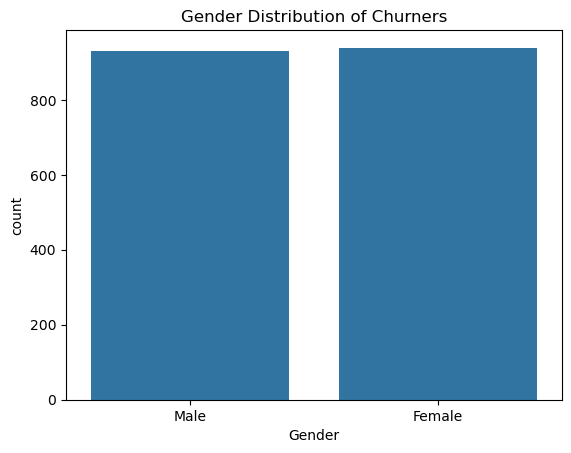

In [9]:
sns.countplot(data=churners, x='Gender')
plt.title("Gender Distribution of Churners")
plt.show()

### The majority of EDA on churners was conducted in Tableau - please see slides for details

### Function to look at most popular groups of services. 

We decided to explore this because if we could determine if there was a particular package/service that a lot of churners were contracted to, this could indicate a high risk demographic within the current customer base that Swan Teleco should pay particular attention to.

In [10]:
def generate_combo_counts(df, service_cols=None):
    # If no specific service columns are provided, use the default list
    if service_cols is None:
        service_cols = [
            'Online Security', 'Online Backup', 'Device Protection',
            'Tech Support', 'Streaming TV', 'Streaming Movies', 'Phone Service'
        ]
        
    # Helper function to joins the names of services that are marked 'Yes' for that customer
    def combo_signature(row):
        return '-'.join([col.replace(' ', '') for col in service_cols if row[col] == 'Yes'])

    df = df.copy()

    # Apply the combo_signature function row-wise to generate a new 'ServiceCombo' column
    df['ServiceCombo'] = df.apply(combo_signature, axis=1)

    # Count how many times each unique service combo appears
    combo_counts = (
        df['ServiceCombo']
        .value_counts()
        .reset_index()
        .rename(columns={'index': 'ServiceCombo', 'count': 'Total'})
    )

    return combo_counts

In [11]:
# Creating variables after using the function on both churners and customers 
churn_combo_counts = generate_combo_counts(churners)
customer_combo_counts = generate_combo_counts(customers)

#### Results for top 10 popular service bundles for <b>churners</b>

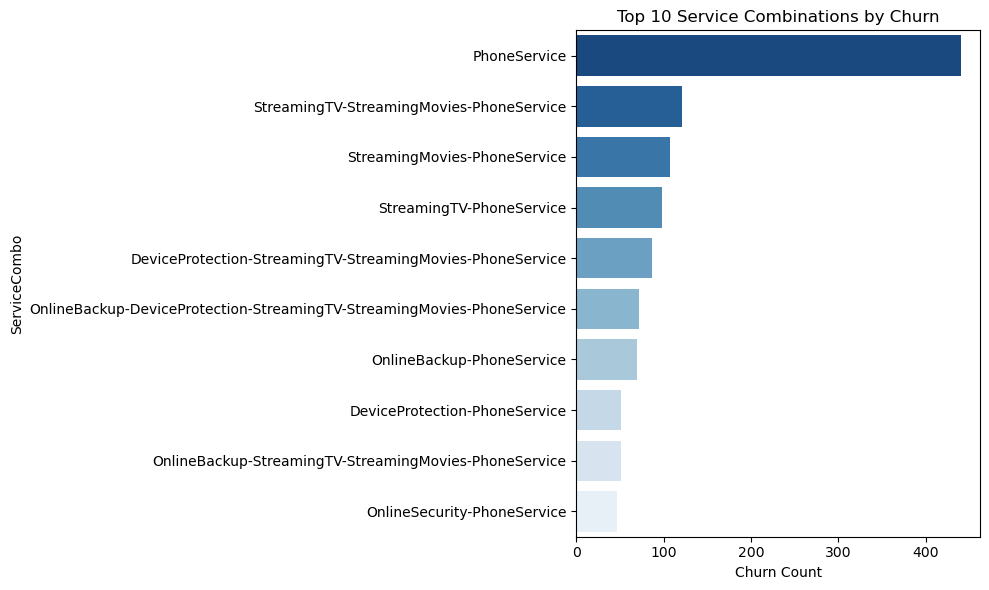

In [12]:
top_combos = churn_combo_counts.head(10)

# Colour palette
palette = sns.color_palette("Blues_r", n_colors=len(top_combos))

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(
    x='Total',
    y='ServiceCombo',
    hue='ServiceCombo',
    data=top_combos,
    palette='Blues_r',
    dodge=False,
    legend=False
)

plt.xlabel('Churn Count')
plt.title('Top 10 Service Combinations by Churn')
plt.tight_layout()
plt.show()

In [13]:
#Table format for precise numbers
churn_combo_counts.head(10)

,ServiceCombo,Total
0,PhoneService,440
1,StreamingTV-StreamingMovies-PhoneService,121
2,StreamingMovies-PhoneService,107
3,StreamingTV-PhoneService,98
4,DeviceProtection-StreamingTV-StreamingMovies-P...,87
5,OnlineBackup-DeviceProtection-StreamingTV-Stre...,72
6,OnlineBackup-PhoneService,70
7,DeviceProtection-PhoneService,51
8,OnlineBackup-StreamingTV-StreamingMovies-Phone...,51
9,OnlineSecurity-PhoneService,47


##### Here we can clearly see that a high % of churners are only contracted to a Phone Service only contract

#### Results for top 10 popular service bundles for <b> customers </b>

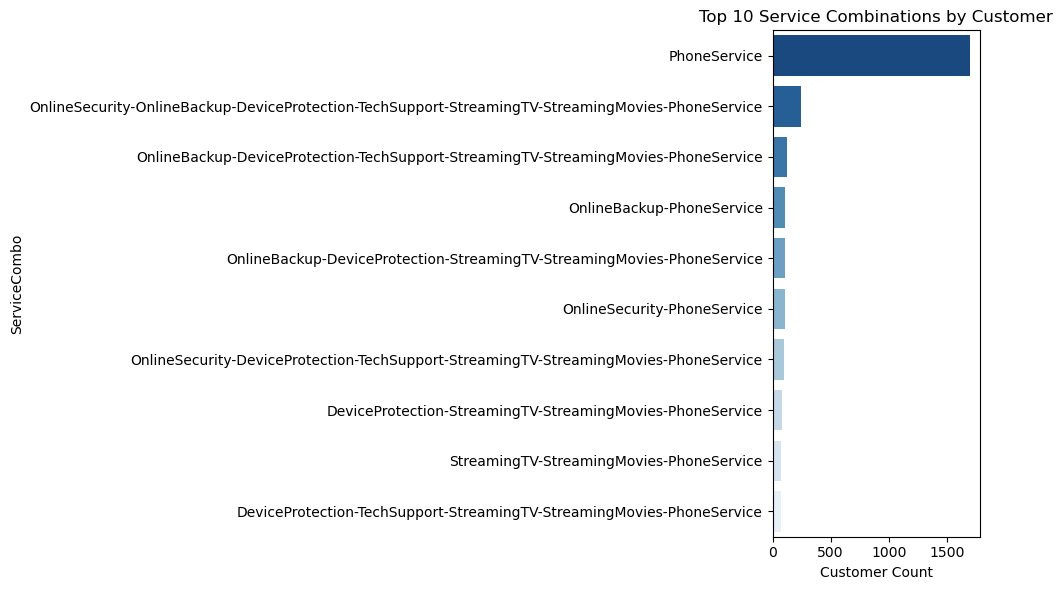

In [14]:
top_combos = customer_combo_counts.head(10)

# Colour palette
palette = sns.color_palette("Blues_r", n_colors=len(top_combos))

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(
    x='Total',
    y='ServiceCombo',
    hue='ServiceCombo',
    data=top_combos,
    palette='Blues_r',
    dodge=False,
    legend=False
)

plt.xlabel('Customer Count')
plt.title('Top 10 Service Combinations by Customer')
plt.tight_layout()
plt.show()

In [15]:
#Table format for precise numbers
customer_combo_counts.head(10)

,ServiceCombo,Total
0,PhoneService,1699
1,OnlineSecurity-OnlineBackup-DeviceProtection-T...,244
2,OnlineBackup-DeviceProtection-TechSupport-Stre...,127
3,OnlineBackup-PhoneService,108
4,OnlineBackup-DeviceProtection-StreamingTV-Stre...,108
5,OnlineSecurity-PhoneService,107
6,OnlineSecurity-DeviceProtection-TechSupport-St...,98
7,DeviceProtection-StreamingTV-StreamingMovies-P...,79
8,StreamingTV-StreamingMovies-PhoneService,76
9,DeviceProtection-TechSupport-StreamingTV-Strea...,72


#### Due to Phone Service only contracts being by far the most likely to churn, we can apply this to our current customers, and suggest that 1699 customers are currently at high risk of churning, and would suggest offering them further services. This is because we can also ascertain from the data, that multi-service packages have a significantly lower rate of churn.